In [12]:
from __future__ import division

%matplotlib inline
import pandas as pd
import thinkdsp
import thinkplot
import autocorr
import numpy as np

In [9]:
meg_data_file_names = ['data/meg_walking.csv','data/meg_jogging.csv','data/meg_upstairs.csv','data/meg_downstairs.csv']
meg_data_dict = {}
activites = ['walking', 'jogging', 'upstairs', 'downstairs']
for i,file in enumerate(meg_data_file_names):
    df = pd.read_csv(file)
    meg_data_dict[activites[i]] = df
print meg_data_dict

{'walking':              x          y         z          time
0     1.310227   5.982512  7.183204  1.430010e+12
1     1.356914   5.880758  7.053917  1.430010e+12
2     1.315015   6.165668  7.748834  1.430010e+12
3     0.656011   5.772420  7.258022  1.430010e+12
4    -1.922544   5.136161  6.883330  1.430010e+12
5    -0.724845   6.194398  7.310695  1.430010e+12
6    -0.593164   6.199187  6.927623  1.430010e+12
7    -0.318429   6.206369  7.368156  1.430010e+12
8    -0.296282   6.321889  6.959346  1.430010e+12
9    -0.325013   6.285378  7.171831  1.430010e+12
10   -0.153827   6.386533  7.010821  1.430010e+12
11   -0.003591   6.422446  6.855198  1.430010e+12
12   -0.035913   6.312912  7.300520  1.430010e+12
13   -0.014964   6.448183  6.934805  1.430010e+12
14   -0.031723   6.433220  6.840833  1.430010e+12
15   -0.059256   6.418855  6.900089  1.430010e+12
16   -0.025738   6.350620  6.952163  1.430010e+12
17    0.062249   6.478111  6.888118  1.430010e+12
18   -0.007183   6.406285  6.931214  1

In [5]:
def evenly_sample_ts(ts):
    return np.linspace(ts.min(), ts.max(), len(ts))

walking              x          y         z          time
0     1.310227   5.982512  7.183204  1.430010e+12
1     1.356914   5.880758  7.053917  1.430010e+12
2     1.315015   6.165668  7.748834  1.430010e+12
3     0.656011   5.772420  7.258022  1.430010e+12
4    -1.922544   5.136161  6.883330  1.430010e+12
5    -0.724845   6.194398  7.310695  1.430010e+12
6    -0.593164   6.199187  6.927623  1.430010e+12
7    -0.318429   6.206369  7.368156  1.430010e+12
8    -0.296282   6.321889  6.959346  1.430010e+12
9    -0.325013   6.285378  7.171831  1.430010e+12
10   -0.153827   6.386533  7.010821  1.430010e+12
11   -0.003591   6.422446  6.855198  1.430010e+12
12   -0.035913   6.312912  7.300520  1.430010e+12
13   -0.014964   6.448183  6.934805  1.430010e+12
14   -0.031723   6.433220  6.840833  1.430010e+12
15   -0.059256   6.418855  6.900089  1.430010e+12
16   -0.025738   6.350620  6.952163  1.430010e+12
17    0.062249   6.478111  6.888118  1.430010e+12
18   -0.007183   6.406285  6.931214  1.430

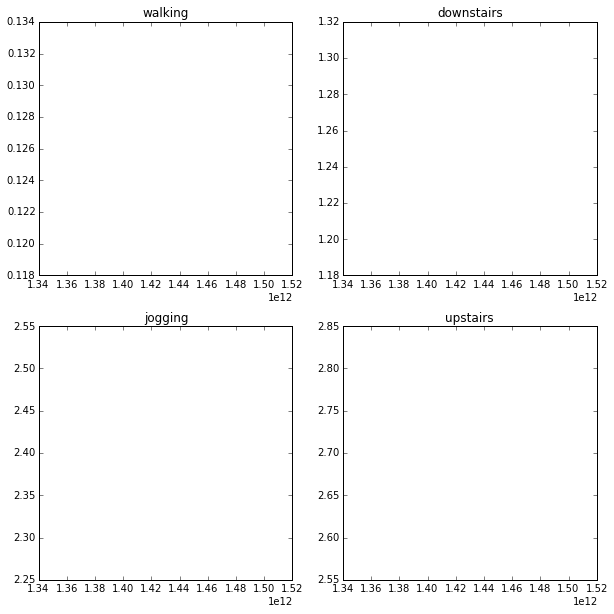

In [14]:
thinkplot.preplot(4, 2, 2)

for plotnum, (g, gdb) in enumerate(meg_data_dict.iteritems()):
    print g,gdb
    time = gdb.time.values
    vals = gdb.x.values
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals) 
    
    thinkplot.subplot(plotnum+1)
    thinkplot.plot(evenly_sampled_ts, interp_vals)
    thinkplot.config(title=g)

In [ ]:
# evenly_sample_ts(